In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def run_market_simulation(num_agents, num_months, initial_price, initial_inventory, initial_budget, initial_production_capacity):

    #Creates arrays to store data over time
    market_prices = [0] * num_months
    total_supply = [0] * num_months
    total_demand = [0] * num_months

    # Initialize agents
    producer_inventory = [initial_production_capacity] * num_agents

    for month in range(num_months):

        current_price = np.mean(market_prices[:month]) if month > 0 else initial_price #Calculate market price (average)

        produced_goods = np.random.normal(loc=50, scale=10, size=num_agents) #Producers decide on supply based on market price

        demanded_goods = np.maximum(np.random.normal(loc=30, scale=15, size=num_agents), 0) # Consumers decide on demand based on market price and budget and ensure positive demand

        # Update Arrays
        total_supply[month] = np.sum(produced_goods)
        total_demand[month] = np.sum(demanded_goods)


        excess_supply = total_supply[month] - total_demand[month] #Calculate excess supply/demand

        market_prices[month] =  current_price - excess_supply/total_supply[month] * 0.2   #Update market price based on excess supply/demand

        producer_inventory -= produced_goods # Update producer's inventory based on sold goods

    return market_prices, total_supply, total_demand

Parameters

In [76]:
initial_price = 20
initial_inventory = 500
initial_budget = 10000
initial_production_capacity = 700

num_agents = 50
num_months = 100

market_prices, total_supply, total_demand = run_market_simulation(num_agents, num_months, initial_price, initial_inventory, initial_budget, initial_production_capacity)

Plot Results

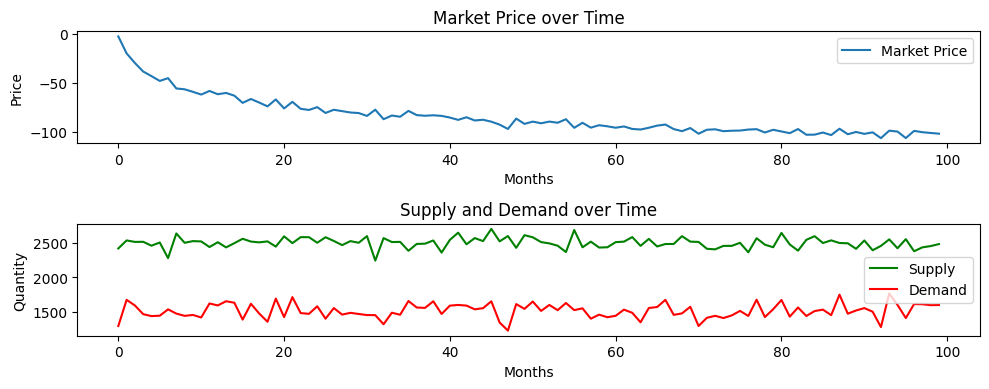

In [77]:
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.plot(market_prices, label='Market Price')
plt.title('Market Price over Time')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(total_supply, label='Supply', color='green')
plt.plot(total_demand, label='Demand', color='red')
plt.title('Supply and Demand over Time')
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.legend()

plt.tight_layout()
plt.show()